# Deep drawing 3D shape prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
import os
import sys
sys.path.insert(0, "../../src")
#sys.path.insert(0, "/home/ingolf.lepenies/projects/ml_karoprod/ipynb/")
from banana_lib import UV2d
from cut_predictor import ProjectionPredictor
sys.path.insert(0, "/home/ingolf.lepenies/projects/ml_karoprod/ipynb/")
from banana_lib import UV2d

## Load the pretrained network

In [2]:
reg_xyz = ProjectionPredictor.from_h5('../../models/springback_uv_xyz.h5')
reg_results = ProjectionPredictor.from_h5('../../models/springback_uv_thickness.h5')

In [3]:
param = {
        'Blechdicke': 1.01, 
        'Niederhalterkraft': 110.0, 
        'Ziehspalt': 2.4, 
        'Einlegeposition': -5, 
        'Ziehtiefe': 30,
        'Stempel_ID': 3,
        'E': 191.37245,
        'Rp0': 238.22696,
        'Rp50': 449.528189,
    }

In [4]:
param = {
        'Blechdicke': 1.01, 
        'Niederhalterkraft': 410.0, 
        'Ziehspalt': 2.4, 
        'Einlegeposition': -5, 
        'Ziehtiefe': 50,
        'Stempel_ID': 3,
        'E': 191.37245,
        'Rp0': 238.22696,
        'Rp50': 449.528189,
    }


In [5]:
df = pd.DataFrame({"v": np.linspace(0.,1,100), "u": .5})
dfr = reg_xyz.predict(param, df)
dfr.head(2)

,v,u,x,y,z
0,0.000000,0.5,-0.491669,-96.616089,1.876729
1,0.010101,0.5,-0.287613,-92.024467,1.866048


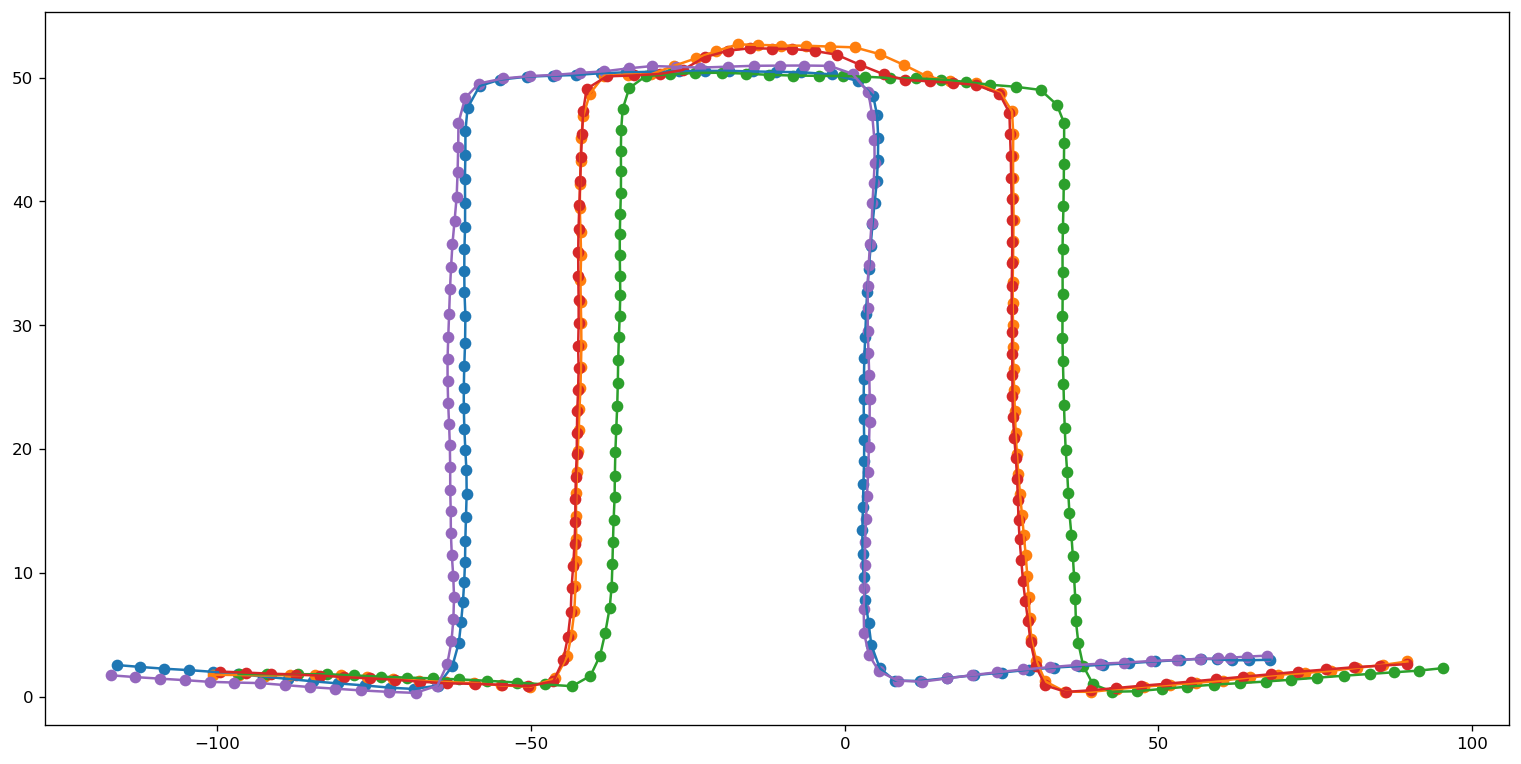

In [6]:
B = 400/25.4
H = 200/25.4
fig, ax = plt.subplots(1, figsize=(B, H))
for u in np.linspace(0.,1,5):
    df = pd.DataFrame({"v": np.linspace(0.,1,100), "u": u})
    dfr = reg_xyz.predict(param, df)
    ax.scatter(dfr.y, dfr.z)
    ax.plot(dfr.y, dfr.z)

In [7]:
elsize = 0.02
filepath = f"../../uvgrids/uv_{elsize}.h5"
uv = UV2d.from_h5(filepath)
uv.reg_results = reg_results
uv.reg_xyz = reg_xyz
uv.predict(param)

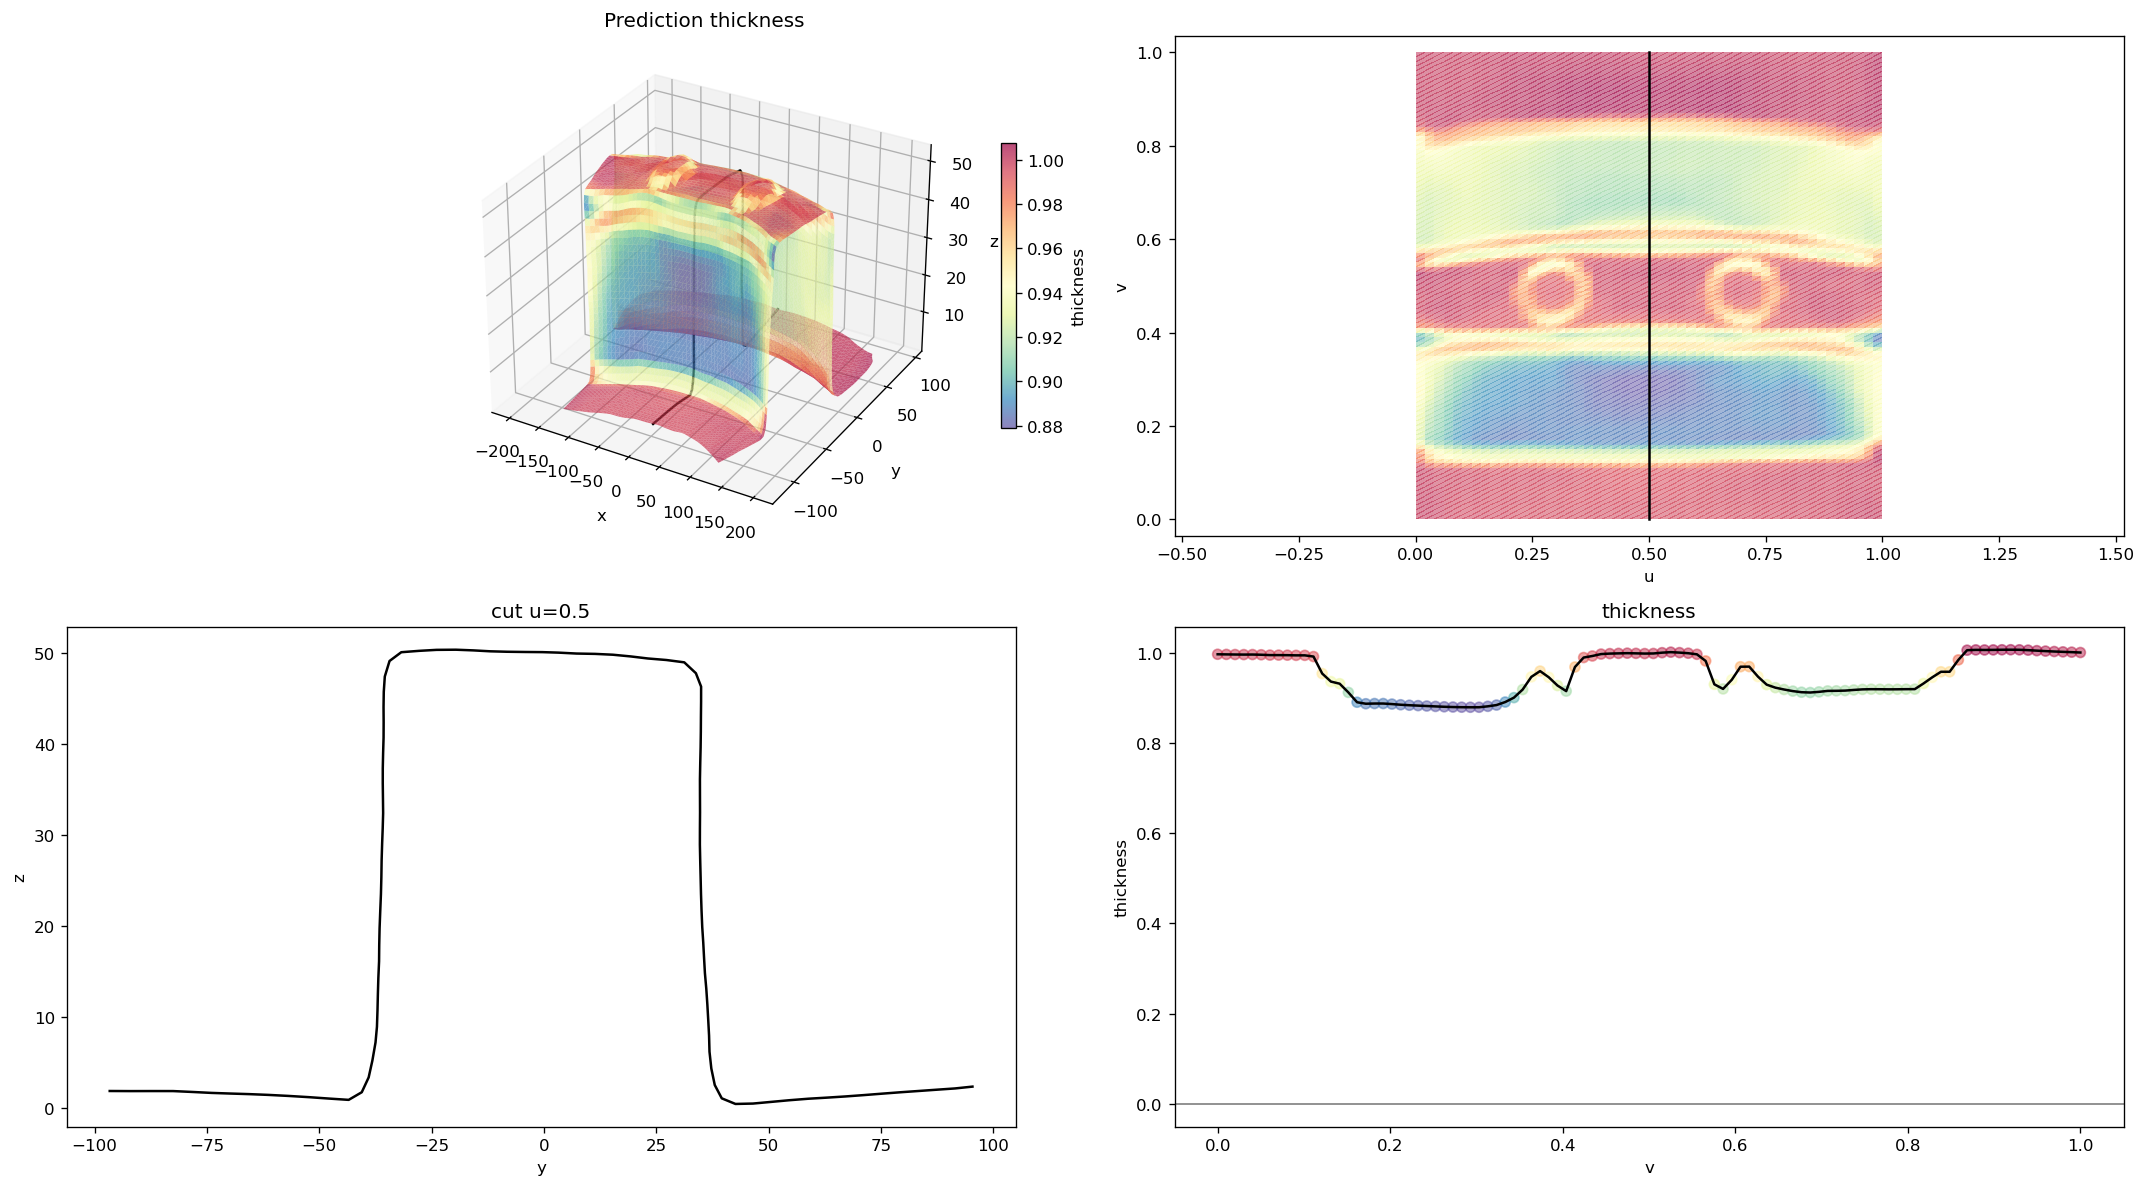

In [13]:
result_name="epseqpl"
result_name="thickness"
#result_name="z"
fig = uv.plot_results_grid_u(result_name=result_name, u=.5)

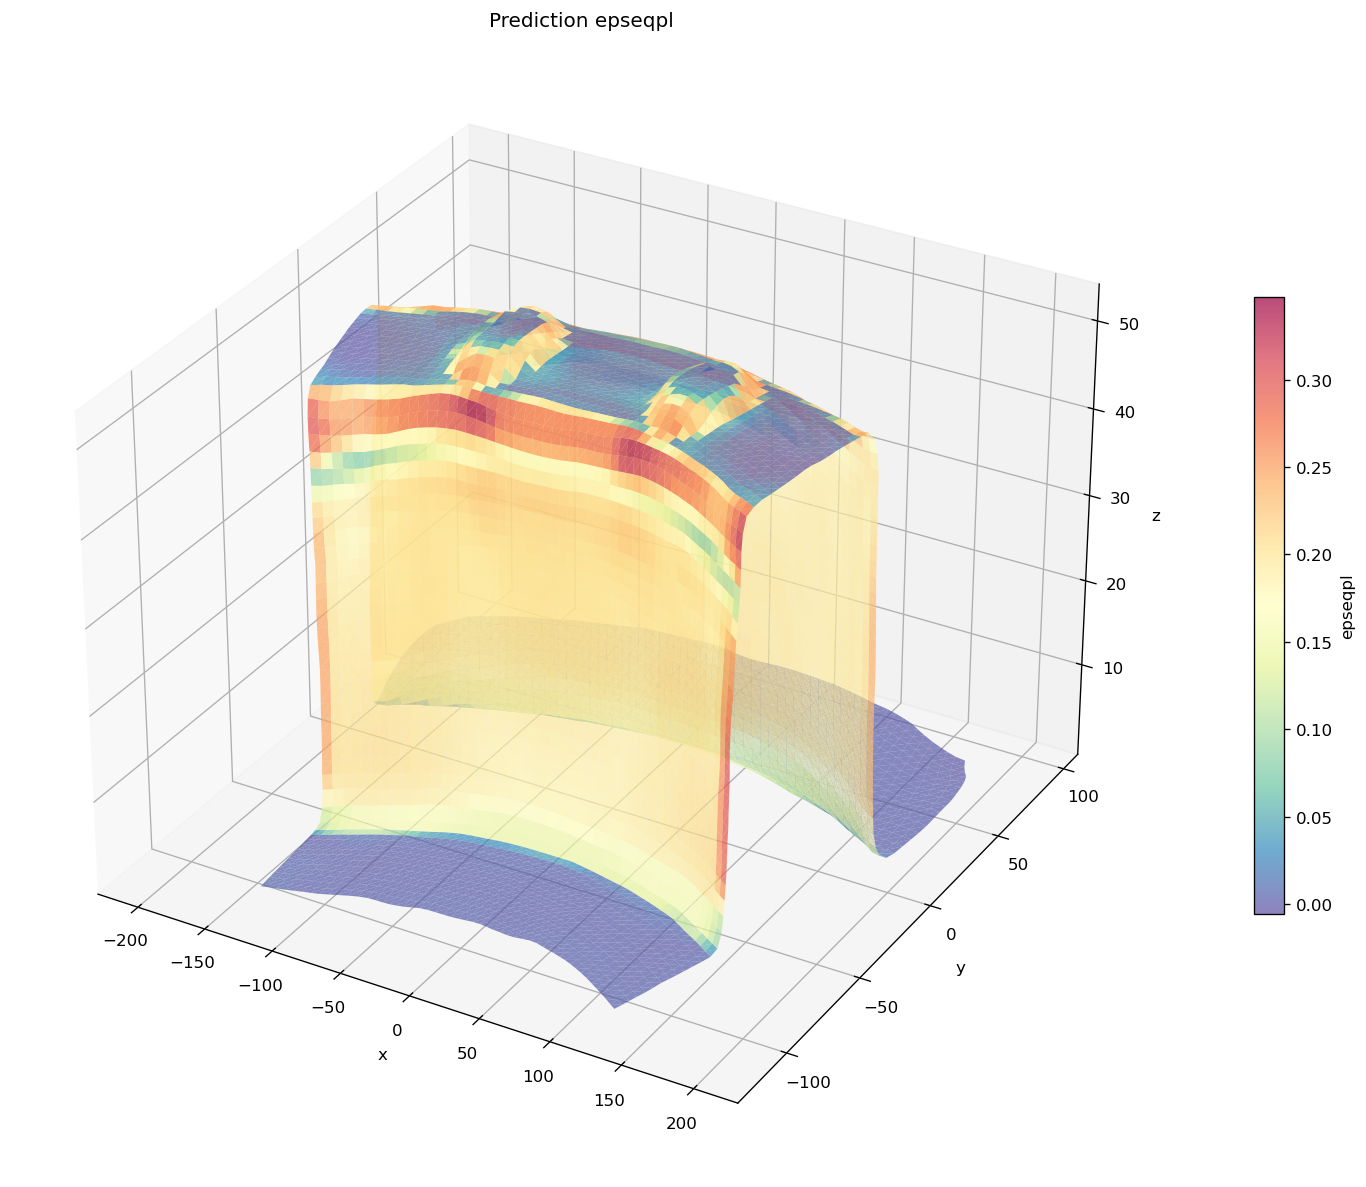

In [9]:
result_name="epseqpl"
fig = uv.plot_results_3d(result_name=result_name)

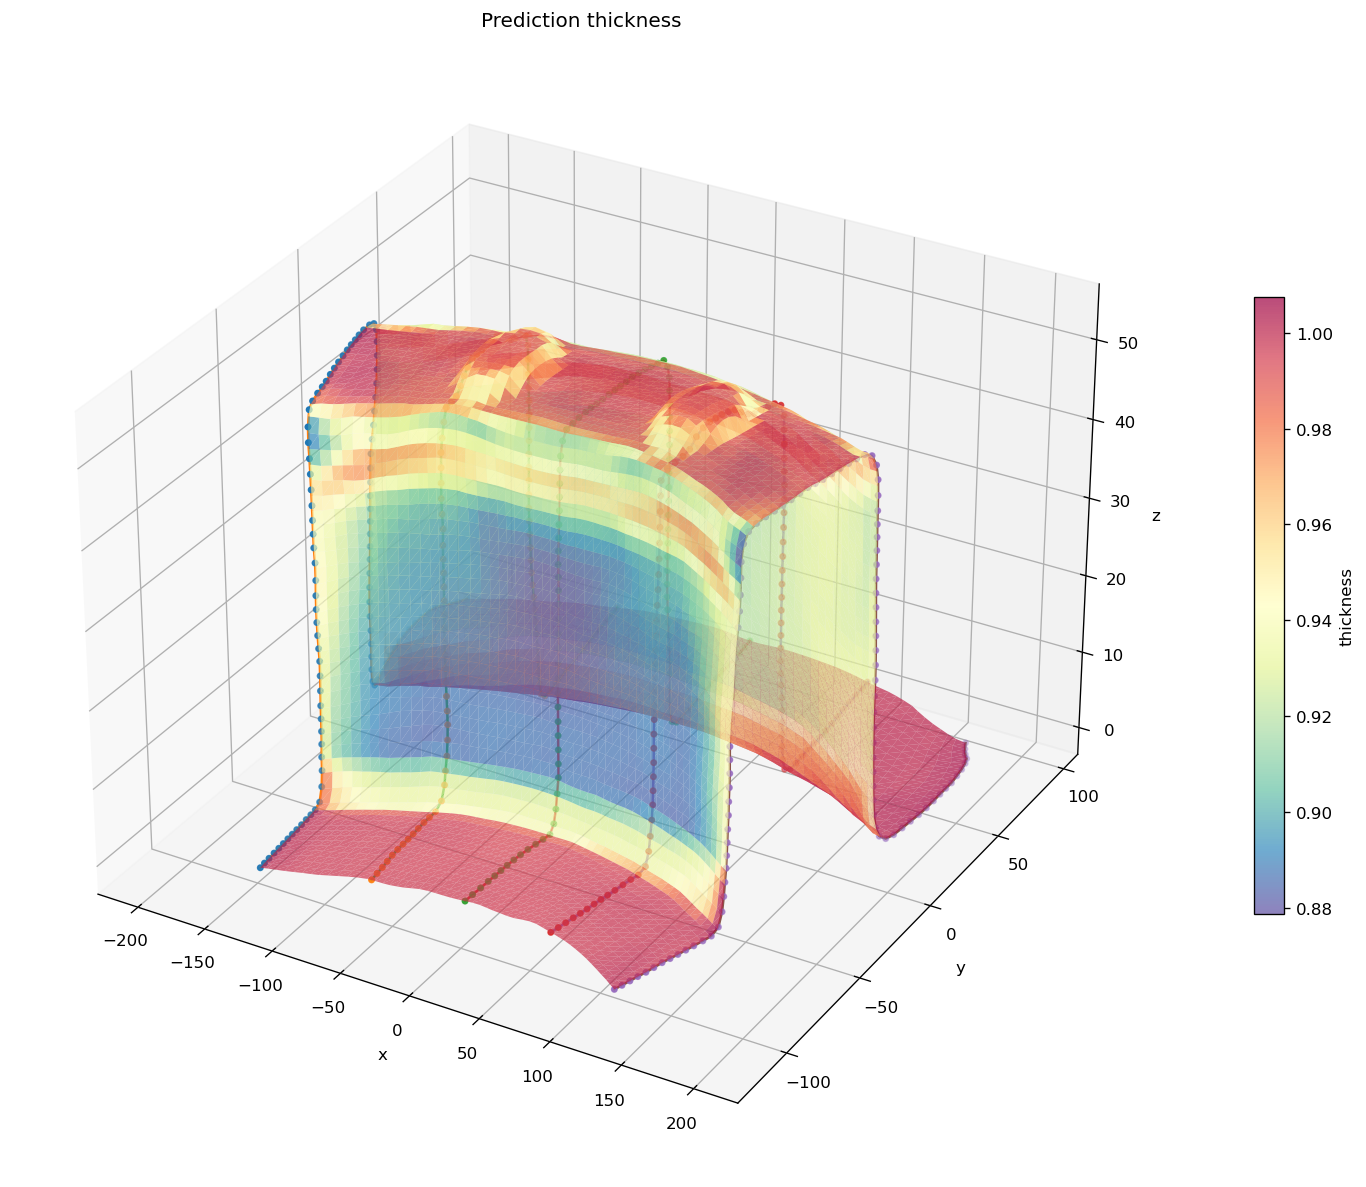

In [10]:
fig = plt.figure(1, figsize=(18,10))
ax = fig.add_subplot(111, projection="3d")
c = ax.plot_trisurf(uv.nodes.x, uv.nodes.y, uv.nodes.z, 
                triangles=uv.elements.simplices.tolist(), cmap=plt.cm.Spectral_r, 
                alpha=.7, shade=False, linewidth=2)
result_name = "thickness"
c.set_array(uv.elements[result_name])
cbar = fig.colorbar(c, fraction=.015, label=result_name, ax=ax)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title(f"Prediction {result_name}")
for u in np.linspace(0.,1,5):
    df = pd.DataFrame({"v": np.linspace(0.,1,100), "u": u})
    dfr = reg_xyz.predict(param, df)
    ax.scatter(dfr.x, dfr.y, dfr.z, s=10)
    ax.plot(dfr.x, dfr.y, dfr.z)
fig.tight_layout()

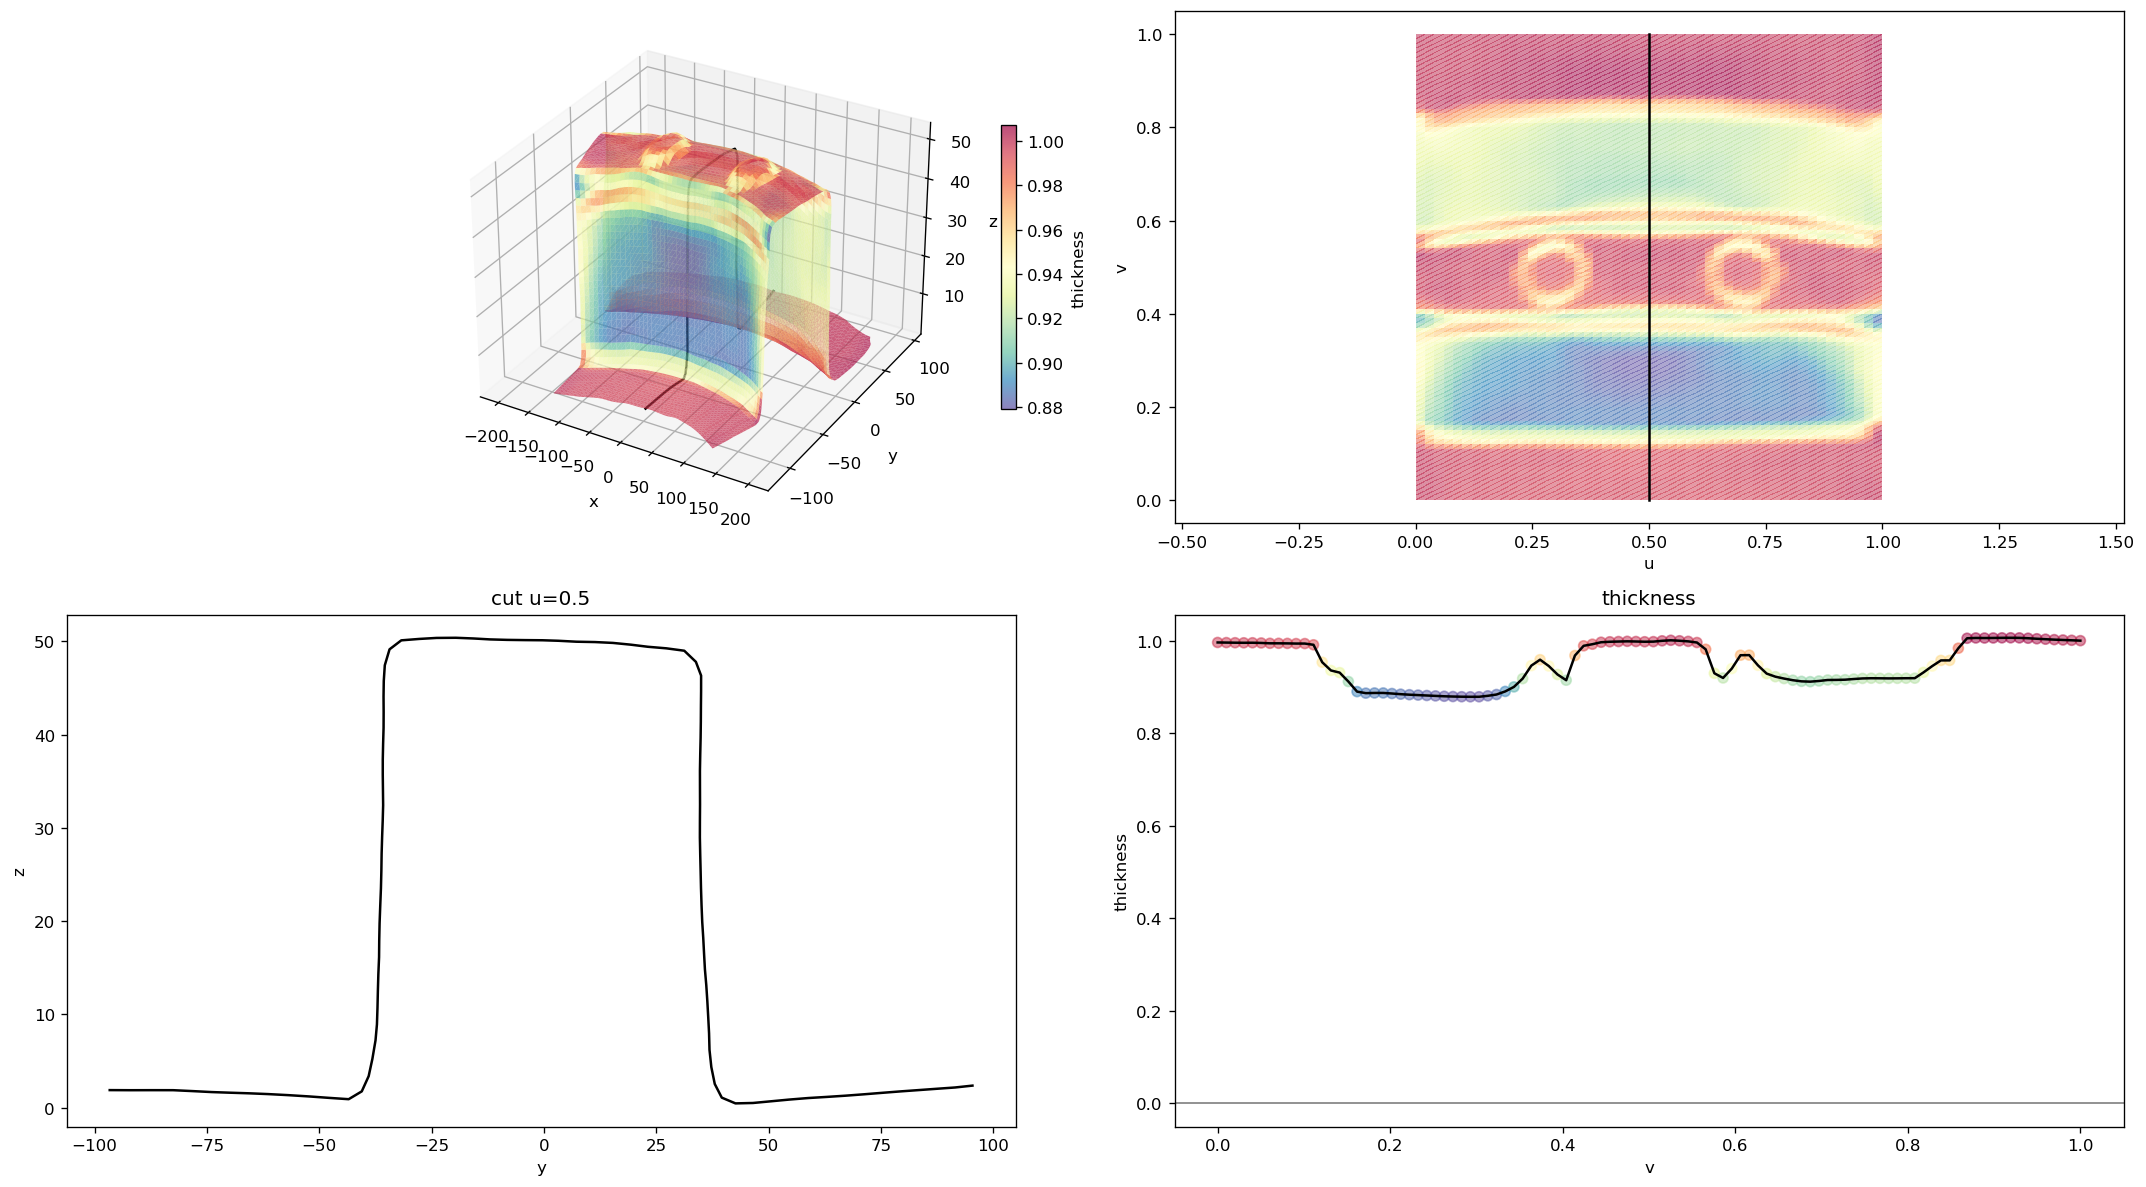

In [11]:
result_name = "thickness"
fig = plt.figure(1, figsize=(18,10))
ax3d = fig.add_subplot(221, projection="3d")
ax2d = fig.add_subplot(222)
axyz = fig.add_subplot(223)
axr = fig.add_subplot(224)
ax2d.set_aspect("equal", "datalim")
c = ax3d.plot_trisurf(uv.nodes.x, uv.nodes.y, uv.nodes.z, 
                triangles=uv.elements.simplices.tolist(), cmap=plt.cm.Spectral_r, 
                alpha=.7, shade=False, linewidth=2)

c.set_array(uv.elements[result_name])
cbar = fig.colorbar(c, fraction=.015, label=result_name, ax=ax3d)
ax3d.set_xlabel("x")
ax3d.set_ylabel("y")
ax3d.set_zlabel("z")
ax2d.set_xlabel("u")
ax2d.set_ylabel("v")
axyz.set_xlabel("y")
axyz.set_ylabel("z")
axr.set_xlabel("v")
axr.set_ylabel(result_name)
ax.set_title(f"Prediction {result_name}")
#ax2d.scatter(uv.elements.u, uv.elements.v, c=uv.elements[result_name], s=10, cmap=plt.cm.Spectral_r)
ax2d.tripcolor(uv.nodes.u, uv.nodes.v, uv.elements.simplices.tolist(), 
               uv.nodes[result_name],
               cmap=plt.cm.Spectral_r, alpha=.5)

u = 0.5
df = pd.DataFrame({"v": np.linspace(0.,1,100), "u": u})
dfr = reg_xyz.predict(param, df)
dfr = reg_results.predict(param, dfr)
#ax3d.scatter(dfr.x, dfr.y, dfr.z, s=10)
ax3d.plot(dfr.x, dfr.y, dfr.z, c="k")
#axyz.scatter(dfr.y, dfr.z, s=10)
axyz.plot(dfr.y, dfr.z, c="k")
axyz.set_title(f"cut u={u}")
axr.set_title(f"{result_name}")
ax2d.plot(dfr.u, dfr.v, c="k")
axr.plot(dfr.v, dfr[result_name], c="k")
axr.scatter(dfr.v, dfr[result_name], c=dfr[result_name], cmap=plt.cm.Spectral_r, alpha=.5)
axr.axhline(0, c="k", lw=1, alpha=.5)
fig.tight_layout()